Sample Data :    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4 

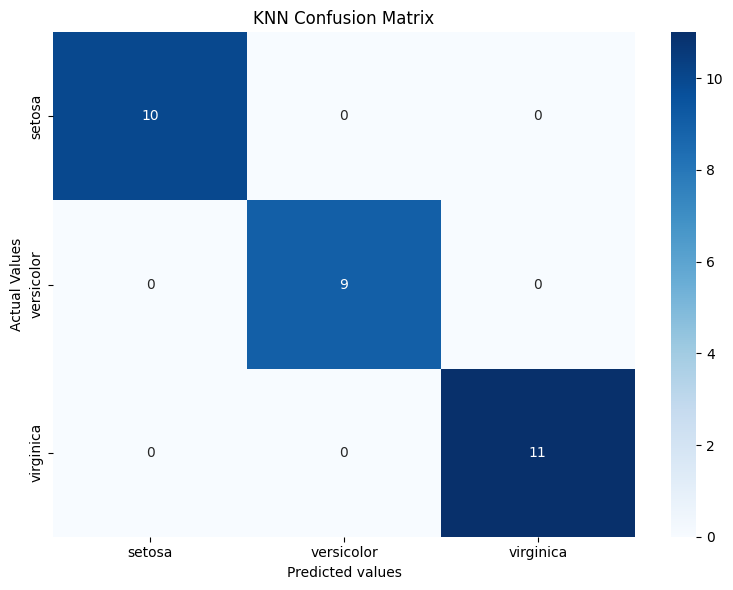

In [24]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris(as_frame = True)
df = iris.frame # mistake
df['species'] = df['target'].map(dict(enumerate(iris.target_names))) # in targets 's' will not be there 
df = df.drop('target',axis = 1) #need to store this in original df to make changes
print(f"Sample Data : {df.head()}\n")

x = df.drop(axis = 1, columns = 'species')
print(x.head(), end = "\n\n")
y = df['species']
print(y.head(),"\n")

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)
print(f"Classfication Report \n: {classification_report(y_pred,y_test)} \n Confusion Matrix :\n {confusion_matrix(y_pred, y_test)} \n")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt = 'd', xticklabels=knn.classes_, yticklabels= knn.classes_, cmap = 'Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.tight_layout()
plt.show()